In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Portfolio/AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Exploration

In [6]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['isFraud'])
# y = df["isFraud"]
# train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,stratify=y)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [9]:
df.describe(include=['O'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1530544995,C1286084959
freq,2237500,3,113


In [10]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


# Data Visualization

In [11]:
df_num_list = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
df_cat_list = ['type','nameOrig','nameDest','step','isFlaggedFraud']
df_num = df[df_num_list]
df_cat = df[df_cat_list]

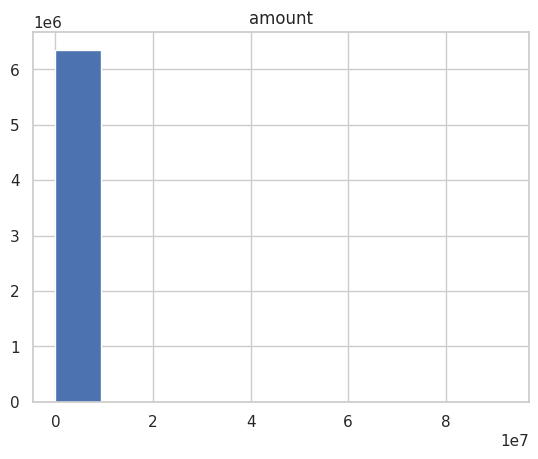

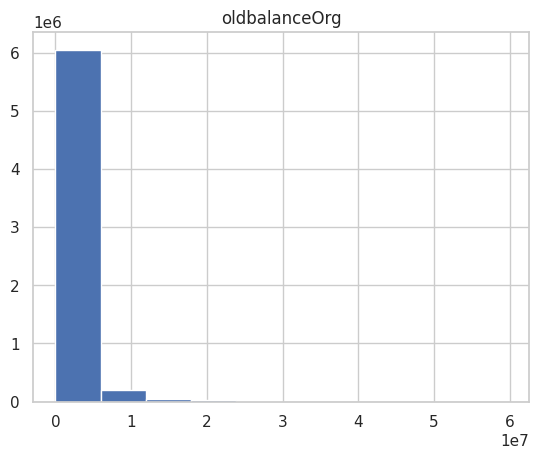

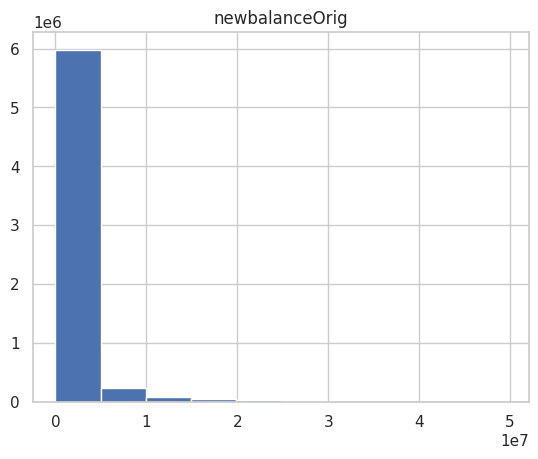

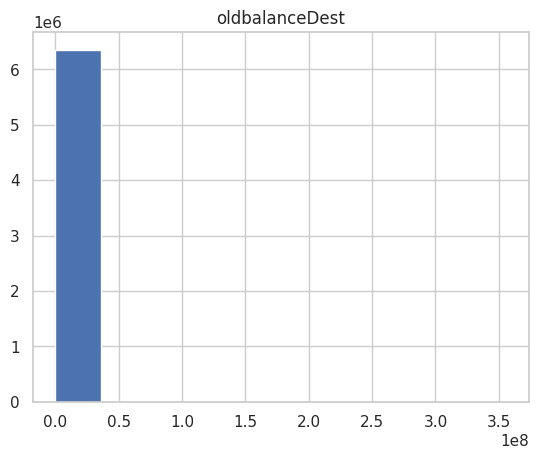

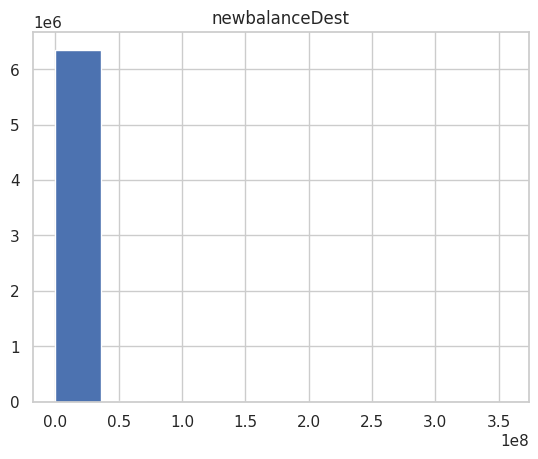

In [12]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

We can tell from the histogram that all numerical features are skewed. Need to do log-transformation.


<Axes: xlabel='amount', ylabel='Count'>

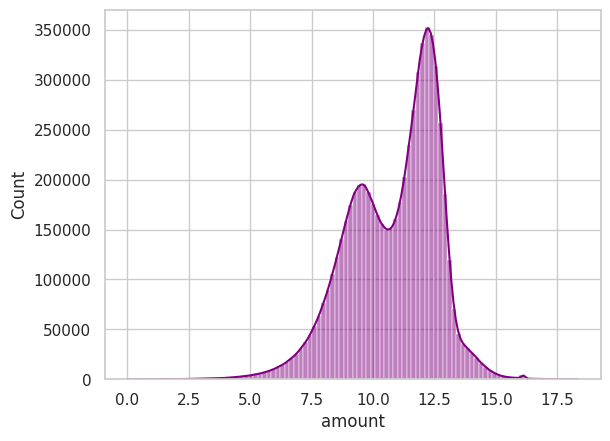

In [13]:
sns.histplot(np.log1p(df_num['amount']),bins=100, kde=True,color='purple')

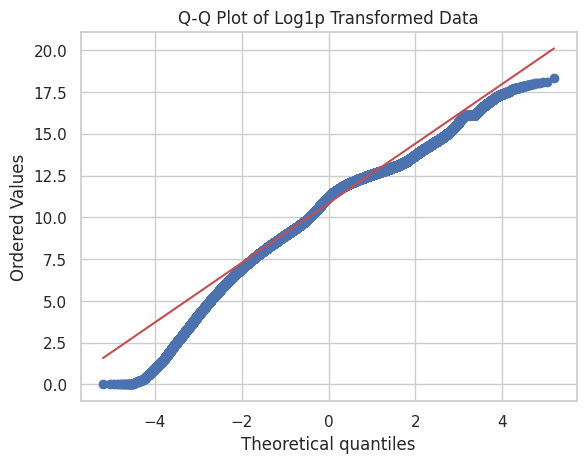

In [14]:
import scipy.stats as stats

# Q-Q plot for log-transformed data
stats.probplot(np.log1p(df['amount']), dist="norm", plot=plt)
plt.title("Q-Q Plot of Log1p Transformed Data")
plt.show()

                amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount            1.00          -0.00           -0.01            0.29   
oldbalanceOrg    -0.00           1.00            1.00            0.07   
newbalanceOrig   -0.01           1.00            1.00            0.07   
oldbalanceDest    0.29           0.07            0.07            1.00   
newbalanceDest    0.46           0.04            0.04            0.98   

                newbalanceDest  
amount                    0.46  
oldbalanceOrg             0.04  
newbalanceOrig            0.04  
oldbalanceDest            0.98  
newbalanceDest            1.00  


<Axes: >

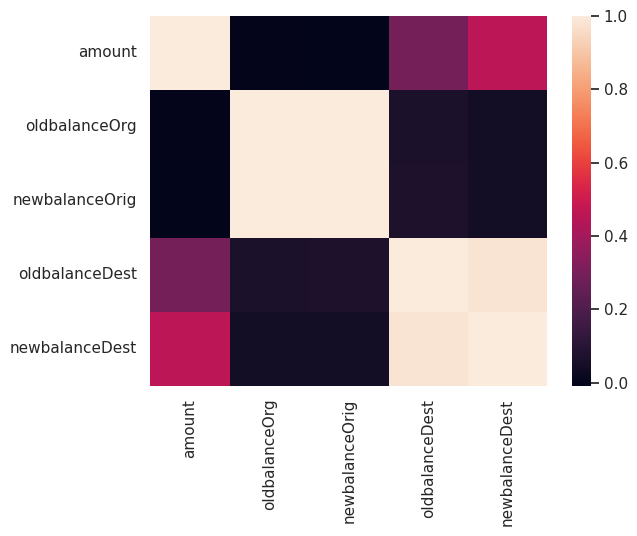

In [15]:
# Correlation of numerical data

print(df_num.corr())
sns.heatmap(df_num.corr())

In [16]:
# for col in df_cat.columns:
#     plt.figure(figsize=(6, 4))
#     vc = df_cat[col].value_counts().reset_index()
#     vc.columns = [col, 'count']
#     sns.barplot(data=vc, x=col, y='count')
#     plt.title(col)
#     plt.xticks(rotation=30)
#     plt.show()


<Axes: xlabel='type'>

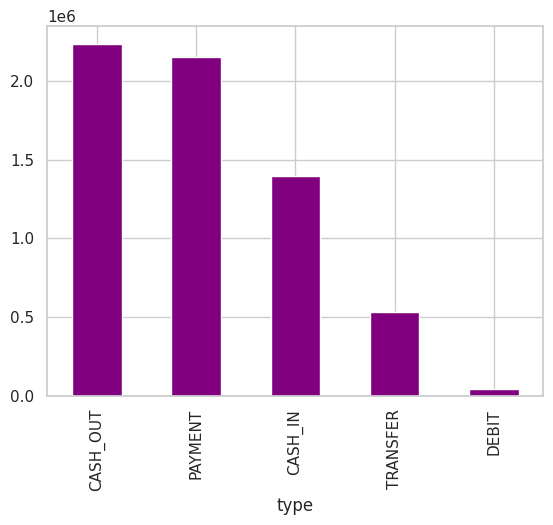

In [17]:
df['type'].value_counts().plot(kind='bar',color='purple')

<Axes: xlabel='type'>

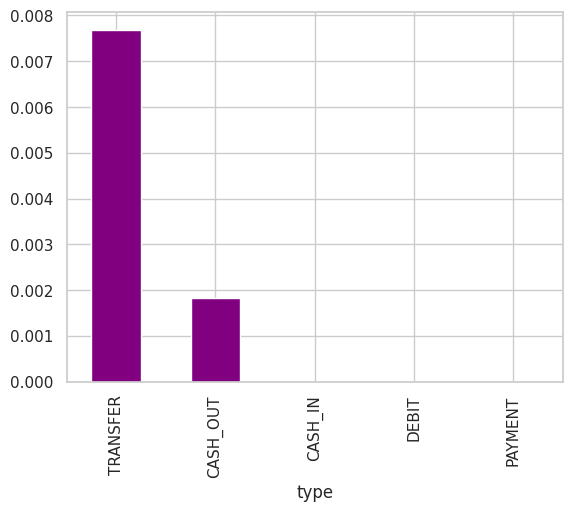

In [18]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',color='purple')

We can tell from the graph that Transfer has highest fraud rate.

# Feature Engineering

In [19]:
df['balanceDiffOrig'] = df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest']-df['oldbalanceDest']

In [20]:
(df['balanceDiffDest']<0).sum()

np.int64(1238864)

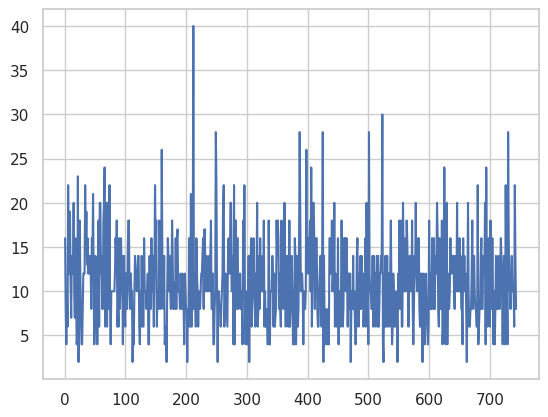

In [21]:
# to see whether fraud amount is time dependent

fraud_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values)

In [22]:
df.drop(columns='step',inplace=True)

In [23]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00


In [24]:
df['isOrigBalanceZero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['isOrigBalanceZero'].describe()

,isOrigBalanceZero
count,6362620.00
mean,0.33
std,0.47
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


In [25]:
df['isDestBalanceZero'] = (df['oldbalanceDest'] == 0).astype(int)
df['isDestBalanceZero'].describe()

,isDestBalanceZero
count,6362620.00
mean,0.43
std,0.49
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


In [26]:
df['isNewOrigBalanceZero'] = (df['newbalanceOrig'] == 0).astype(int)
df['is_full_debit'] = (df['amount'] == df['oldbalanceOrg']).astype(int)

In [27]:
df['is_full_debit'].describe()

,is_full_debit
count,6362620.00
mean,0.00
std,0.04
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


# Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
df_model = df.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,isOrigBalanceZero,isDestBalanceZero,isNewOrigBalanceZero,is_full_debit
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00,0,1,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00,0,1,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,0,1,1,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00,0,0,1,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13,0,1,1,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00,0,1,1,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27,0,0,1,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00,0,1,1,1


In [30]:
cat_col = ['type','isOrigBalanceZero','isDestBalanceZero','isNewOrigBalanceZero','is_full_debit']
num_col = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [31]:
skewed_cols = num_col
df_model[skewed_cols] = df_model[skewed_cols].apply(lambda x: np.log1p(x))

In [32]:
y = df_model['isFraud']
X = df_model.drop(columns=['isFraud'],axis=1)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [34]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isOrigBalanceZero,isDestBalanceZero,isNewOrigBalanceZero,is_full_debit
3035847,PAYMENT,5.15,0.00,0.00,0.00,0.00,0.00,0.00,1,1,1,0
1837871,PAYMENT,9.38,0.00,0.00,0.00,0.00,0.00,0.00,1,1,1,0
1032956,CASH_IN,11.88,15.91,15.92,12.73,0.00,-144654.24,-337677.91,0,0,0,0
1117320,CASH_OUT,12.17,12.38,10.70,14.69,14.76,193248.82,193248.82,0,0,0,0
4191999,PAYMENT,9.84,0.00,0.00,0.00,0.00,0.00,0.00,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3856861,CASH_IN,10.97,8.67,11.07,0.00,0.00,-58120.04,0.00,0,1,0,0
1445138,PAYMENT,6.23,0.00,0.00,0.00,0.00,0.00,0.00,1,1,1,0
4429116,CASH_OUT,12.50,0.00,0.00,16.84,16.86,0.00,268918.20,1,0,1,0
6063505,CASH_IN,12.64,14.80,14.91,15.91,15.87,-307866.74,-307866.74,0,0,0,0


In [35]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_col),
    ('cat', cat_pipeline, cat_col)],
    remainder="drop"
)


# Model Building

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

In [39]:
# rfc = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [2, 4],
#     'criterion': ['gini']
# }

# CV_rfc = GridSearchCV(
#     rfc,
#     param_grid,
#     cv=StratifiedKFold(n_splits=3),
#     n_jobs=-1,
#     verbose=1
# )
# pipefinalrfc = make_pipeline(preprocessor, CV_rfc)
# pipefinalrfc.fit(X_train, y_train)

In [46]:
# rfc = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=15,
#     min_samples_split=10,
#     min_samples_leaf=4,
#     criterion='gini',
#     random_state=42,
#     n_jobs=-1
# )

# pipe_rfc = make_pipeline(preprocessor, rfc)

# pipe_rfc.fit(X_train, y_train)

In [41]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    C=0.1,
    random_state=42
)

pipe_lr = make_pipeline(preprocessor, lr)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'isOrigBalanceZero',
                                                   'isDestBalanceZero',
                                                   'isNewOrigBalanceZero',
                                                   'is_full_debit'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [42]:
y_pred = pipe_lr.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.88      1.00      0.93      2464

    accuracy                           1.00   1908786
   macro avg       0.94      1.00      0.97   1908786
weighted avg       1.00      1.00      1.00   1908786



In [44]:
confusion_matrix(y_test,y_pred)

array([[1905976,     346],
       [      7,    2457]])

In [45]:
pipe_lr.score(X_test,y_test)

0.9998150657014458

In [54]:
import joblib
joblib.dump(pipe_lr, '/content/drive/MyDrive/Data Science Portfolio/fraud_detection_lr_pipeline.pkl')


['/content/drive/MyDrive/Data Science Portfolio/fraud_detection_lr_pipeline.pkl']

In [51]:
from joblib import load
pipeline = load("fraud_detection_lr_pipeline.pkl")